In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정 
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv(r"C:\skproject\pyproject\Mall_Customers.csv")

# 불필요한 식별자 제거
df.drop(columns=['CustomerID'], inplace=True)
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


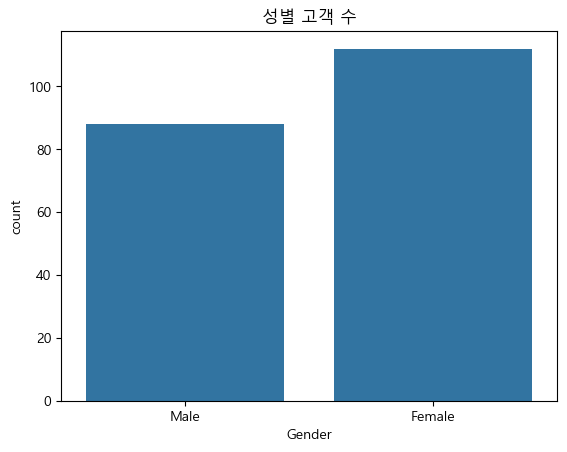

In [4]:
# 성별 분포
sns.countplot(x='Gender', data=df)
plt.title('성별 고객 수')
plt.show()


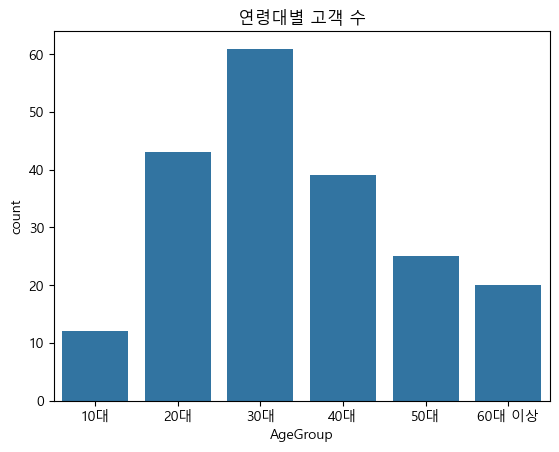

In [5]:
# 연령대 구간 생성
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 19, 29, 39, 49, 59, 100],
                        labels=['10대', '20대', '30대', '40대', '50대', '60대 이상'])

# 연령대별 고객 수 시각화
sns.countplot(x='AgeGroup', data=df, order=df['AgeGroup'].value_counts().sort_index().index)
plt.title('연령대별 고객 수')
plt.show()


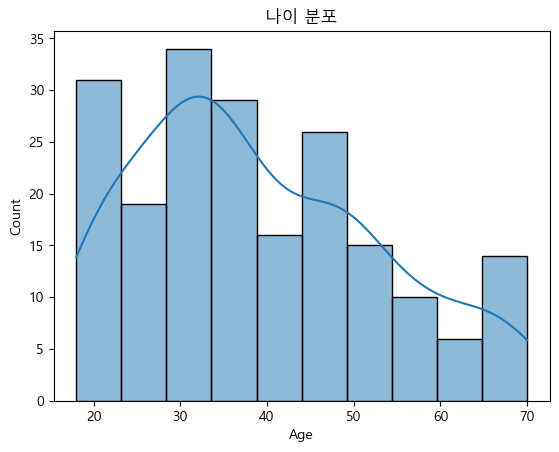

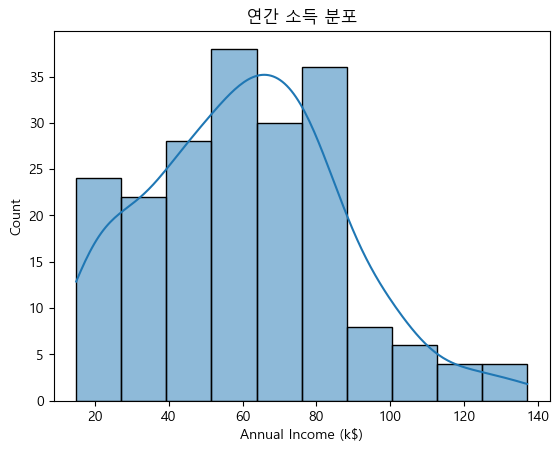

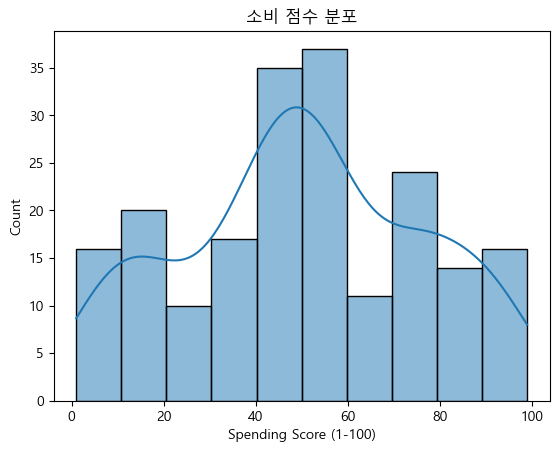

In [6]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('나이 분포')
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('연간 소득 분포')
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('소비 점수 분포')
plt.show()


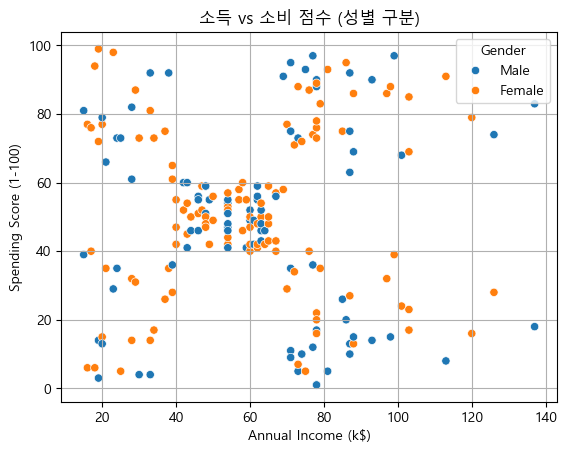

In [7]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('소득 vs 소비 점수 (성별 구분)')
plt.grid(True)
plt.show()


In [8]:
df.groupby('AgeGroup')['Spending Score (1-100)'].mean()


C:\Users\User\AppData\Local\Temp\ipykernel_12996\3545586897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Spending Score (1-100)'].mean()


AgeGroup
10대       46.500000
20대       61.953488
30대       61.098361
40대       34.948718
50대       34.720000
60대 이상    43.000000
Name: Spending Score (1-100), dtype: float64

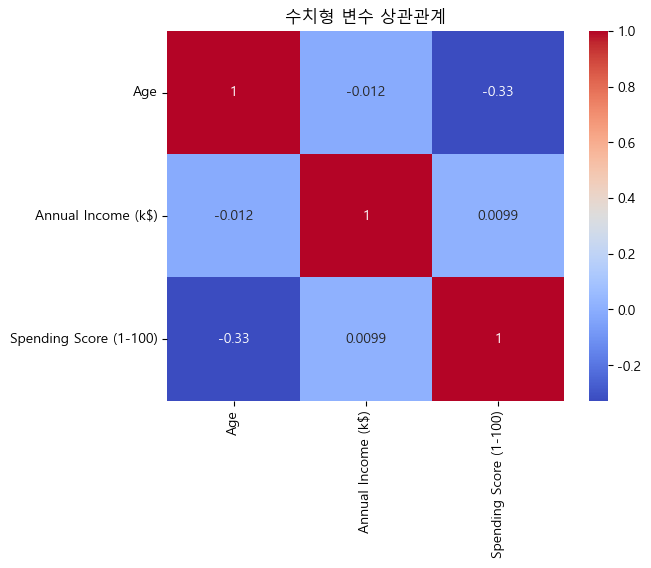

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('수치형 변수 상관관계')
plt.show()
